# Klein-Gordon Equation

## Start from wave equation

Since Klein-Gordon equation has one more term than wave equation, and it is also a linear equation, so let us introduce wave equation first.

We have learned the linear one-dimensional diffusion equation:

\begin{equation}\frac{\partial u}{\partial t}= \nu \frac{\partial^2 u}{\partial x^2}\end{equation}

We now know how to deal with the second-order derivative in space. The finite-difference method of Central Difference Scheme was introduced to solve it.

Everyone should be familar with the wave equation:

\begin{equation}\frac{\partial^2 u}{\partial t^2}= c^2 \frac{\partial^2 u}{\partial x^2}\end{equation}

Beacuse we know that the time should be always forward, should we use the same method of Cetral Difference Scheme to derivative the second-order in time?

## CTCS

The answer of the question above is yes! Since we are not quite sure about the CTCS scheme is right or not, let us try to get this in another way.

We are going to solve the wave equation by the solution of coupled first-order PDEs. Now, let us rewrite wave equation.

So, we set:

\begin{equation}\ r= c \frac{\partial u}{\partial x}\end{equation}

\begin{equation}\ s=  \frac{\partial u}{\partial t}\end{equation}

which means wave equation can be rewrited as:

\begin{equation}\frac{\partial r}{\partial t}= c \frac{\partial s}{\partial x}\end{equation}

\begin{equation}\frac{\partial s}{\partial t}= c \frac{\partial r}{\partial x}\end{equation}

\begin{equation}\frac{\partial u}{\partial t}= s\end{equation}

Let's set U and F as two vectors as what we have learned in moduel 1. 

\begin{align}
U & = \begin{pmatrix} r \\ s \end{pmatrix} & F(U) & = \begin{pmatrix} 0 & -c \\ -c & 0 \end{pmatrix} U \nonumber
\end{align}

And then we can get:

\begin{equation}\frac{\partial U}{\partial t}= - \frac{\partial F(U)}{\partial x}\end{equation}

The leapfrog scheme was introuduced in the class, since we get a first-order PDE now, we are going to try leapfrog half-step on it.

\begin{equation}r_{i+1/2}^{n+1} = r_{i+1/2}^{n} + \frac{\Delta t}{\Delta x}(s^{n+1/2}_{i+1}- s^{n+1/2}_{i}) + {\mathcal O}(\Delta x^2) \end{equation}

\begin{equation}s_{i}^{n+1/2} = s_{i}^{n-1/2} + \frac{\Delta t}{\Delta x}(r^{n}_{i+1/2}- r^{n}_{i-1/2})  + {\mathcal O}(\Delta x^2) \end{equation}

And we know so much about cetral difference, let us write down the central difference of r and s at the half of the mesh points:

\begin{equation}r_{i+1/2}^{n} = c(u^n_{i+1}- u^n_{i})/\Delta x + {\mathcal O}(\Delta x) \end{equation}

\begin{equation}s_{i}^{n+1/2} = (u^{n+1}_i- u^n_{i})/\Delta t  + {\mathcal O}(\Delta t) \end{equation}

Next, put the these two equation into the leapfrog half-step equation. Right now we can get the representation of wave equation with leapfrog scheme:

\begin{equation}\frac{u_{i}^{n+1}-2u_{i}^{n}+u_{i}^{n-1}}{\Delta t^2}=c^2\frac{u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}}{\Delta x^2}\end{equation}

Good! This is the second-order differencing of wave equation, and this is also the CTCS.



## Question of this scheme?

Let us rearrange the equation above, and isolate $u_{i}^{n+1}$, so we can get:

\begin{equation}u_{i}^{n+1}=\frac{c^2\Delta t^2}{\Delta x^2}u_{i+1}^{n} + 2u_{i}^{n}(1-\frac{c^2\Delta t^2}{\Delta x^2})+\frac{c^2\Delta t^2}{\Delta x^2}u_{i-1}^{n}-u_{i}^{n-1}\end{equation}

Here is the stencil for this.

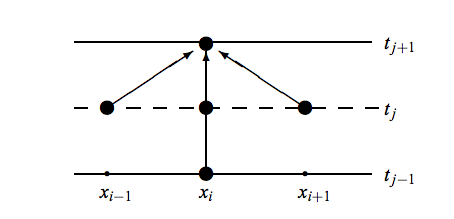

In [1]:
from IPython.display import Image
Image(filename='stencil for CTCS.png')


But right now, let us take $u_{i}^{1}$ for example:

\begin{equation}u_{i}^{1}=\frac{c^2\Delta t^2}{\Delta x^2}u_{i+1}^{0} + 2u_{i}^{0}(1-\frac{c^2\Delta t^2}{\Delta x^2})+\frac{c^2\Delta t^2}{\Delta x^2}u_{i-1}^{0}-u_{i}^{-1}\end{equation}

what we found here? If we have the intial condition to get $u_{i}^{0}$, how to deal with $u_{i}^{-1}$? It just like "Ghost point" which we have learned in the class.

Since we need to have two intial conditions to solve second-order derivative in time, the first intial condition is $u(x, 0) = a(x)$ and the second one is ${\partial u(x, 0)}/{\partial t} = b(x)$.



What we can use here is the second intial conditon. We know that:

\begin{equation}\frac{\partial u(x_{i}, 0)}{\partial t}= b(x) = \frac{ u_{i}^{1}-u_{i}^{-1}}{2\Delta t} + {\mathcal O}(\Delta t^2)\end{equation}

After isolating the $u_{i}^{-1}$, it should be:

\begin{equation}u_{i}^{-1} = u_{i}^{1} - 2\Delta tb(x) \end{equation}

Put this into the equation of $u_{i}^{1}$, what we can get is:

\begin{equation}u_{i}^{1}=0.5(\frac{c^2\Delta t^2}{\Delta x^2}u_{i+1}^{0} + 2a(x)(1-\frac{c^2\Delta t^2}{\Delta x^2})+\frac{c^2\Delta t^2}{\Delta x^2}u_{i-1}^{0}+2\Delta t b(x))\end{equation}

Now, we are good to code!

In [2]:
import numpy                       
from matplotlib import pyplot    
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [3]:
#defining basic parameters

l  =  10.
nx =  101
dx =  2*l/(nx-1)
x  =  numpy.linspace(-10., 10., nx)
T  =  20
dt =  0.1
nt =  int(T/dt)
c  =  1.
alpha = dt/dx

## Set conditions for the problem

Let us take Gaussian intial conditions as example,

\begin{equation}G_{\sigma}(x) = e^{-x^2/\sigma^2}\end{equation}

So the initial conditions are:

\begin{equation}u(x, 0) = AG_\sigma(x)\end{equation}

\begin{equation}\frac{\partial u(x, 0)}{\partial t}= 0\end{equation}

A is an arbitrary amplitude, let us take A = 6, $\sigma$ = 1.

For the boundary conditions, we set Neumann boundary conditions at x = l and x = -l.

In [4]:
#Defining the function to get the numerical solution
def solve_wave_equation(nx, nt, dx, dt, ax, alpha):
    
    """Solve the 1D Wave Equation by CTCS
    
    Parameters:
    ----------
    nx : interger
        Number of grid points in x
    nt : integer
        Number of time step
    dx : float
        Mesh size
    dx : float
        Time step size
    ax : array of float
        Initial condition
    alpha: float
        CFL number
        
    Returns:
    -------
    u : array of float
        Position profile after nt time steps
    """
    
    u  = numpy.zeros((nt, nx))
    un = numpy.zeros_like(u)
#intial condition
    u[0,:]    = ax
    u[1,1:-1] = 0.5*(alpha**2*u[0,2:] + 2*ax[1:-1]*(1-alpha**2)\
                     + alpha**2*u[0,:-2])
    
    for t in range(1, nt-1):
        un = u.copy()
        u[t+1, 1:-1] = alpha**2*un[t, 2:] + 2*un[t, 1:-1]*(1-alpha**2)\
                        + alpha**2*un[t, :-2] - un[t-1, 1:-1]
        
#boundary conditions
        u[t, 0]  =  u[t, 1]
        u[t, -1] =  u[t, -2]
        
    return u

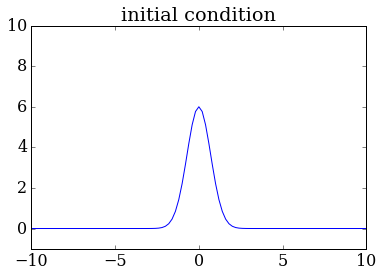

In [5]:
ax = 6*(numpy.exp(-x**2/1))
bx = 0
pyplot.figure(figsize=(6,4))
pyplot.plot(x, ax, label = 'ax')
pyplot.ylim(-1,10)
pyplot.title('initial condition')

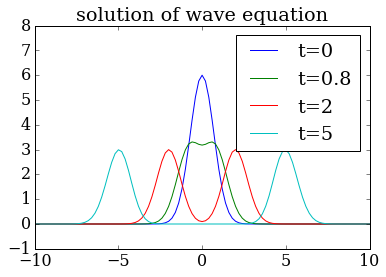

In [6]:
u_solution=solve_wave_equation(nx, nt, dx, dt, ax, alpha)

pyplot.figure(figsize=(6,4))
pyplot.plot(x,u_solution[0,:], label='t=0')
pyplot.plot(x,u_solution[int(0.8/dt),:], label='t=0.8')
pyplot.plot(x,u_solution[int(2/dt),:], label='t=2')
pyplot.plot(x,u_solution[int(5/dt),:], label='t=5')
pyplot.ylim(-1,8)
pyplot.title('solution of wave equation')
pyplot.legend(loc='best')

## The analytical solution for this problem

Since we chose the Gaussian initial conditions, there must be a analytical solution for this problem.

Let us write down:

\begin{equation}\ u(x, t) =  \frac{A}{2}[G_{\sigma}(x+ct) + G_{\sigma}(x-ct)]\end{equation}

it equals to:
\begin{equation}\ u(x, t) =  \frac{A}{2}[e^{-(x+ct/\sigma)^2} + e^{-(x-ct/\sigma)^2}]\end{equation}

Let us plot this analytical solution out.

In [7]:
#Plot the analytical solution
A = 6
u_analytical = numpy.zeros((nt, nx))
t_set = numpy.linspace(0, T, nt)
for i, t in enumerate(t_set):
    u_analytical[i,:] = A/2*(numpy.exp(-(x+c*t/1)**2)\
                              + numpy.exp(-(x-c*t/1)**2))

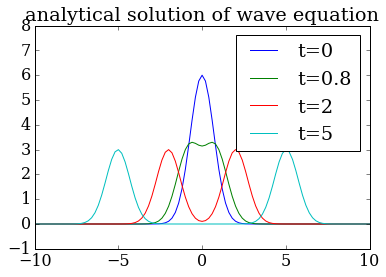

In [9]:
pyplot.figure(figsize=(6,4))
pyplot.plot(x,u_analytical[0,:], label='t=0')
pyplot.plot(x,u_analytical[int(0.8/dt),:], label='t=0.8')
pyplot.plot(x,u_analytical[int(2/dt),:], label='t=2')
pyplot.plot(x,u_analytical[int(5/dt),:], label='t=5')
pyplot.ylim(-1,8)
pyplot.title('analytical solution of wave equation')
pyplot.legend(loc='best')

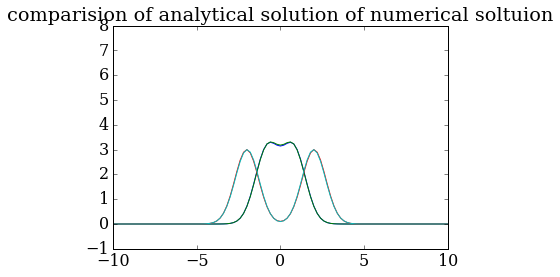

In [15]:
pyplot.figure(figsize=(6,4))
pyplot.plot(x,u_analytical[int(0.8/dt),:], label='analytical solution t=0.8')
pyplot.plot(x,u_solution[int(0.8/dt),:], label='numerical solution t=0.8')
pyplot.plot(x,u_analytical[int(2/dt),:], label='analytical solution')
pyplot.plot(x,u_solution[int(2/dt),:], label='solution')
pyplot.ylim(-1,8)
pyplot.title('comparision of analytical solution of numerical soltuion')

After comparing two figures of analytical solution and numerical soltuion, we found that these two solution are the same, it definitely proves our CTCS scheme method is good to solve second-order both in space and time.

## Back to Klein-Gordon Equation

Let us introduce Klein-Gordon equation first. So where to apply this equation? Klein-Gordon equation is applied in relativistic quantum mechanics, it can be used to described all the spinless particles with positive, negative as well as zero charge.

Here is the 1D equation:

\begin{equation}\frac{\partial^2\psi}{\partial t^2}= c^2 (\frac{\partial^2 \psi}{\partial x^2}-\frac{m^2c^2}{h^2}\psi)\end{equation}

But it is often written in natural units form:

\begin{equation}\frac{\partial^2\psi}{\partial t^2}= \frac{\partial^2 \psi}{\partial x^2}-m^2\psi\end{equation}